## Building a fully functional ANN I

**0) Loading and Preparing Data**

Importing libraries:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing the spiral data set 
#pip install nnfs
from nnfs.datasets import spiral_data

<br>

Importing the spiral dataset (Nsamples for each class):

In [3]:
Nsample  = 300
Nclasses = 5
[X, Y]   = spiral_data(samples = Nsample, classes = Nclasses)

Plotting the dataset:

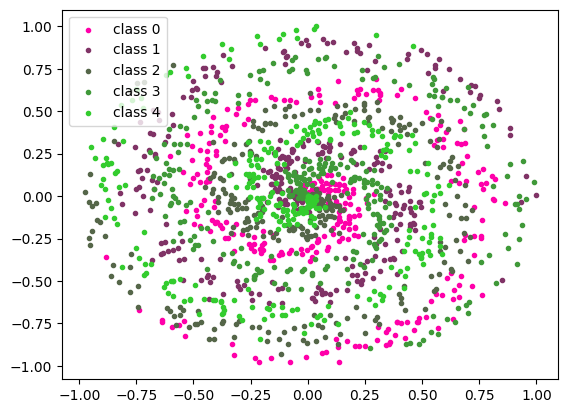

In [5]:
for n in range(Nclasses):
    idx   = np.argwhere(Y == n)[:,0]
    xplot = X[idx,0]
    yplot = X[idx,1]
    plt.scatter(xplot, yplot, marker = '.', color = [1/(n+1), n/Nclasses, 2/(2*n + 3)], label = 'class ' + str(n))
plt.legend()
plt.show()

Expecially if the data clouds have a complex shape like this, standard ML tools (k-means, SVM etc) fail. Thererore, pretty much the only choice is an ANN.<br>
Let us first define all the tools we need for an ANN:<br>
<br>

**1) Defining all the Parts we need for an ANN**<br>
<br>
We start with defining the dense layer:

In [11]:
class Layer_Dense():
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.biases  = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output  = np.dot(inputs, self.weights) + self.biases
        self.inputs  = inputs

Furthermore, we want to have some flexibility concerning the activation functions and therefore define a *ReLU* layer and a *sigmoid layer*:

In [20]:
class Activation_ReLU():
    
    def forward(self, inputs):
        self.output  = np.maximum(0, inputs)
        self.inputs  = inputs

In [22]:
class Activation_Sigmoid():
        
    def forward(self, inputs):
        self.output = np.clip(1/(1 + np.exp(-inputs)), 1e-7, 1-1e-7)
        self.inputs = inputs

<br>

**2) The ANN**

In the next step, we call the different instances of the layers and stack them togehter to a *serial ANN*.

In [16]:
Nneurons1 = 64
Nfeatures = X.shape[1]

dense1    = Layer_Dense(Nfeatures, Nneurons1)
dense_reg = Layer_Dense(Nneurons1, 1)        #for regression: one value for each data point
dense_cla = Layer_Dense(Nneurons1, Nclasses) #for classification: Nclasses values (later: probability for each class) for each data point

In [24]:
ReLU      = Activation_ReLU()
Sigm      = Activation_Sigmoid()

As a first test, let us run the input matrix X through the network:

In [26]:
dense1.forward(X)
ReLU.forward(dense1.output)
dense_reg.forward(ReLU.output)

In [28]:
dense_cla.forward(ReLU.output)

We make sure that the shape of the outputs is correct: 

In [30]:
X.shape #Ndatapoints x Nfeatures

(1500, 2)

In [32]:
dense1.output.shape #Ndatapoints x Nneurons 

(1500, 64)

In [34]:
dense1.weights.shape #Nfeatures x Nneurons

(2, 64)

In [36]:
dense1.biases.shape #1 x Nneurons

(1, 64)

The activation functions do not change the shape of their input.

In [38]:
print(dense1.output.shape)
print(ReLU.output.shape)

(1500, 64)
(1500, 64)
